In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('manufacturing_dataset_1000_samples.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week                 1000 n

In [2]:
# Step 2.1: Data Exploration and Understanding

# 1. Display dataset shape
print("Dataset Shape:", df.shape)

# 2. Display data types of each column
print("\nData Types:")
print(df.dtypes)

# 3. Summary statistics for numerical and categorical data
print("\nSummary Statistics:")
print(df.describe(include='all'))


Dataset Shape: (1000, 19)

Data Types:
Timestamp                      object
Injection_Temperature         float64
Injection_Pressure            float64
Cycle_Time                    float64
Cooling_Time                  float64
Material_Viscosity            float64
Ambient_Temperature           float64
Machine_Age                   float64
Operator_Experience           float64
Maintenance_Hours               int64
Shift                          object
Machine_Type                   object
Material_Grade                 object
Day_of_Week                    object
Temperature_Pressure_Ratio    float64
Total_Cycle_Time              float64
Efficiency_Score              float64
Machine_Utilization           float64
Parts_Per_Hour                float64
dtype: object

Summary Statistics:
                  Timestamp  Injection_Temperature  Injection_Pressure  \
count                  1000            1000.000000         1000.000000   
unique                 1000                    NaN      

Step2.2
Check for missing values and outliers

In [3]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Timestamp                      0
Injection_Temperature          0
Injection_Pressure             0
Cycle_Time                     0
Cooling_Time                   0
Material_Viscosity            20
Ambient_Temperature           20
Machine_Age                    0
Operator_Experience           20
Maintenance_Hours              0
Shift                          0
Machine_Type                   0
Material_Grade                 0
Day_of_Week                    0
Temperature_Pressure_Ratio     0
Total_Cycle_Time               0
Efficiency_Score               0
Machine_Utilization            0
Parts_Per_Hour                 0
dtype: int64


Step 2.3 
Understand the business meaning of each variable

| **Column**                       | **Business Meaning**                                                                                                                |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **Timestamp**                    | The exact date and time when the manufacturing cycle data was recorded. Useful for time-series analysis and shift-based trends.     |
| **Injection\_Temperature**       | The temperature (°C) at which material is injected into the mold. Affects product quality, cycle time, and energy consumption.      |
| **Injection\_Pressure**          | The pressure (bar) used to inject material into the mold. Influences product density, surface finish, and defect rates.             |
| **Cycle\_Time**                  | The time (seconds) taken for one complete production cycle, excluding cooling. Directly impacts throughput.                         |
| **Cooling\_Time**                | The cooling duration (seconds) within the cycle. Balances product quality (avoiding warping) and speed.                             |
| **Material\_Viscosity**          | A measure of how easily the raw material flows. Affects mold filling and product consistency.                                       |
| **Ambient\_Temperature**         | The surrounding environmental temperature (°C) in the production area, which can influence material cooling and machine efficiency. |
| **Machine\_Age**                 | Age of the machine (years). Older machines may have higher maintenance needs and lower efficiency.                                  |
| **Operator\_Experience**         | Number of months the operator has worked on the process. Experienced operators usually reduce defects and downtime.                 |
| **Maintenance\_Hours**           | Hours spent on maintenance for the machine during the observed period. High values may indicate machine reliability issues.         |
| **Shift**                        | The production shift (Day, Evening, Night). Important for analyzing performance differences between shifts.                         |
| **Machine\_Type**                | Category/type of machine (e.g., Type\_A, Type\_B, Type\_C). Different machines may have varying capabilities and efficiencies.      |
| **Material\_Grade**              | Quality grade of raw material used (Economy, Standard, Premium). Impacts product quality, durability, and cost.                     |
| **Day\_of\_Week**                | The day when production took place. Helps spot weekday vs. weekend performance differences.                                         |
| **Temperature\_Pressure\_Ratio** | Ratio of injection temperature to pressure. A process control metric that can signal efficiency or risk of defects.                 |
| **Total\_Cycle\_Time**           | Complete time (seconds) for one production cycle, including cooling. Key factor for production planning.                            |
| **Efficiency\_Score**            | A performance indicator (0–1 scale) combining factors like speed, quality, and uptime. Higher is better.                            |
| **Machine\_Utilization**         | Percentage of time the machine is actively producing (0–1 scale). Low utilization may mean downtime or inefficiencies.              |
| **Parts\_Per\_Hour**             | Average number of parts produced per hour. Direct measure of productivity.                                                          |


Step 2.4 
Identify the target variable distribution

Parts_Per_Hour (assumed target variable).

Step 3: Exploratory Data Analysis (EDA)
Goal: Discover patterns and relationships in manufacturing data

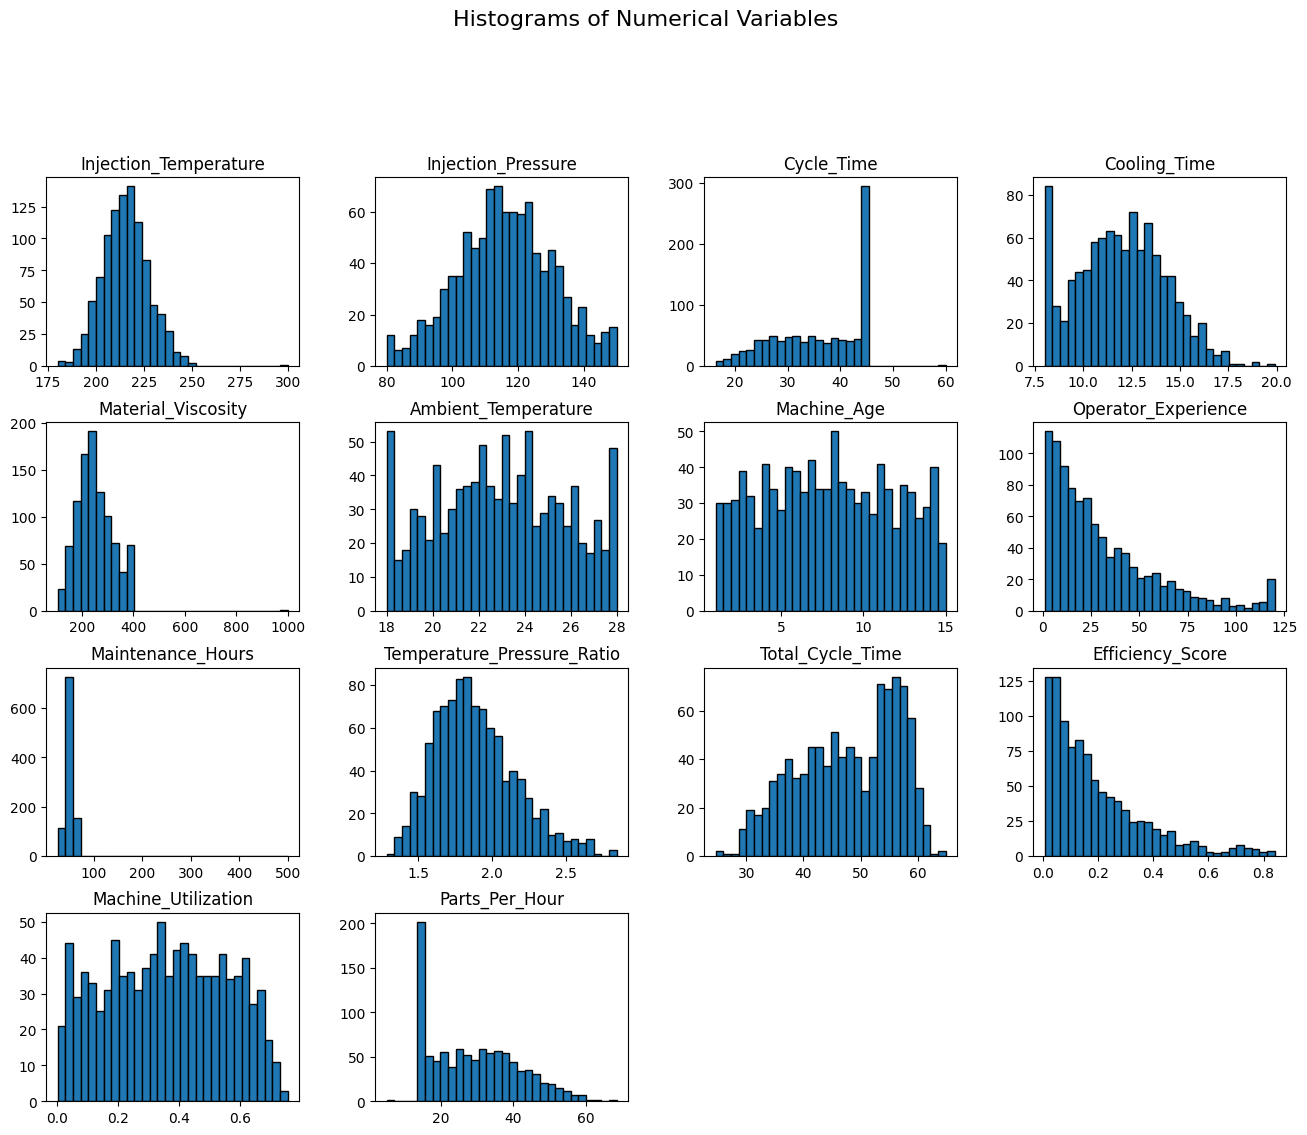

In [5]:
# Step 3.1 
# Create histograms for all variables to understand distributions

# Select numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms
df[numeric_cols].hist(bins=30, figsize=(16, 12), edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Variables", fontsize=16, y=1.02)
plt.show()

Correlation Matrix:
                             Injection_Temperature  Injection_Pressure  \
Injection_Temperature                    1.000000           -0.047187   
Injection_Pressure                      -0.047187            1.000000   
Cycle_Time                              -0.029448           -0.001274   
Cooling_Time                            -0.034085            0.008873   
Material_Viscosity                      -0.029799           -0.029467   
Ambient_Temperature                     -0.049005            0.021043   
Machine_Age                              0.062579           -0.025381   
Operator_Experience                      0.020909            0.026999   
Maintenance_Hours                       -0.025889           -0.009318   
Temperature_Pressure_Ratio               0.400671           -0.914916   
Total_Cycle_Time                        -0.042658            0.005126   
Efficiency_Score                         0.018696            0.023127   
Machine_Utilization           

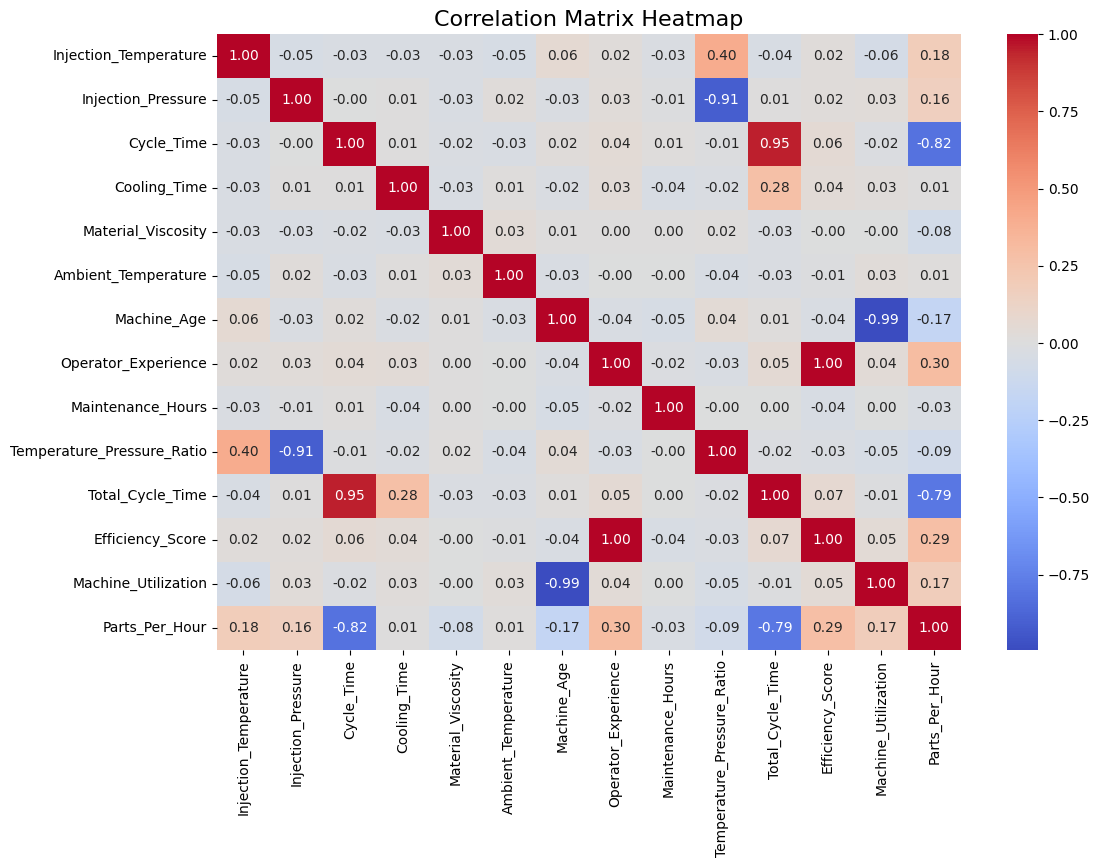

In [6]:
# Step 3.2 Generate correlation matrix to identify relationships
# Compute correlation matrix for numerical variables
corr_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

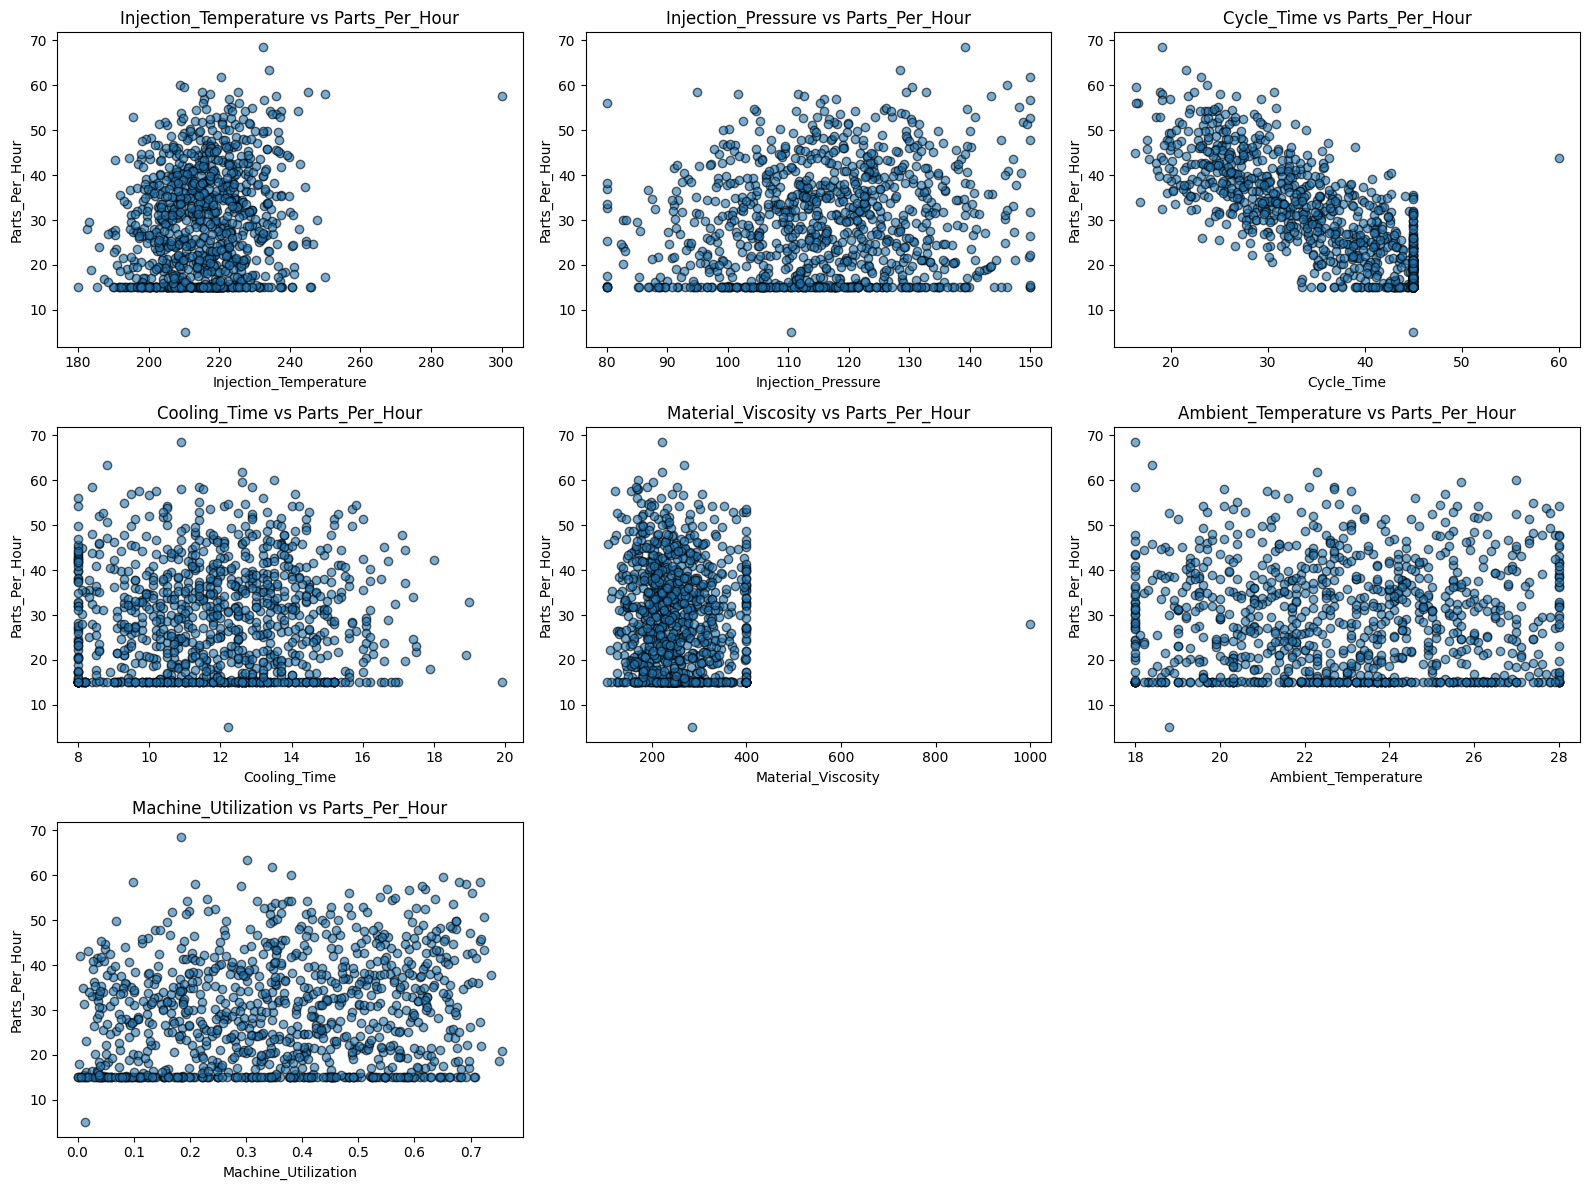

In [7]:
# Step 3.3 Create scatter plots between key operational parameters and output
import matplotlib.pyplot as plt

# Define key operational parameters
key_params = [
    'Injection_Temperature',
    'Injection_Pressure',
    'Cycle_Time',
    'Cooling_Time',
    'Material_Viscosity',
    'Ambient_Temperature',
    'Machine_Utilization'
]

target_var = 'Parts_Per_Hour'

# Create scatter plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(key_params, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[col], df[target_var], alpha=0.6, edgecolor='k')
    plt.title(f"{col} vs {target_var}")
    plt.xlabel(col)
    plt.ylabel(target_var)

plt.tight_layout()
plt.show()



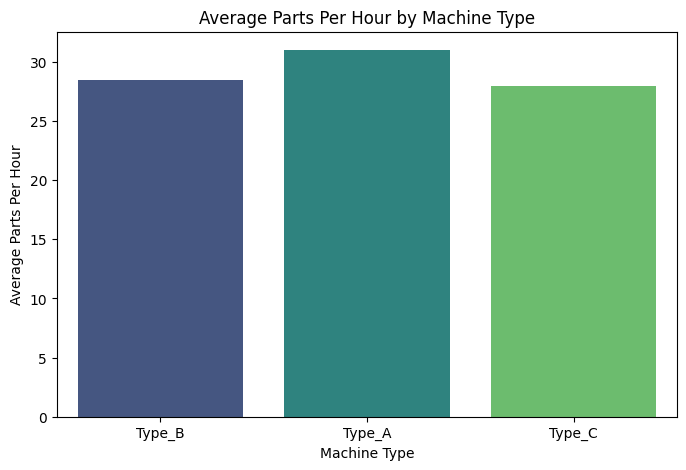

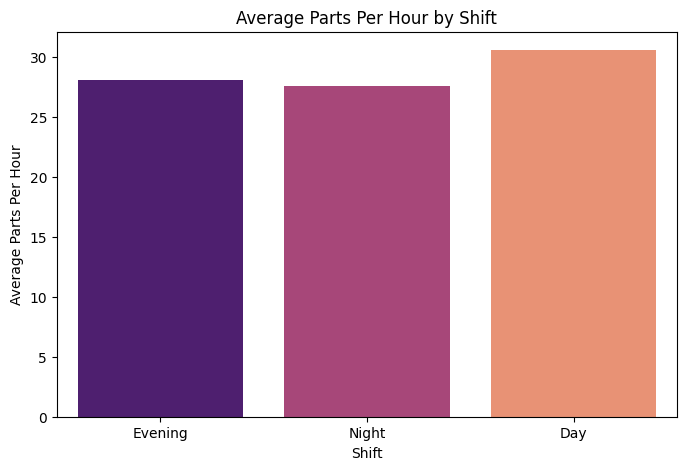

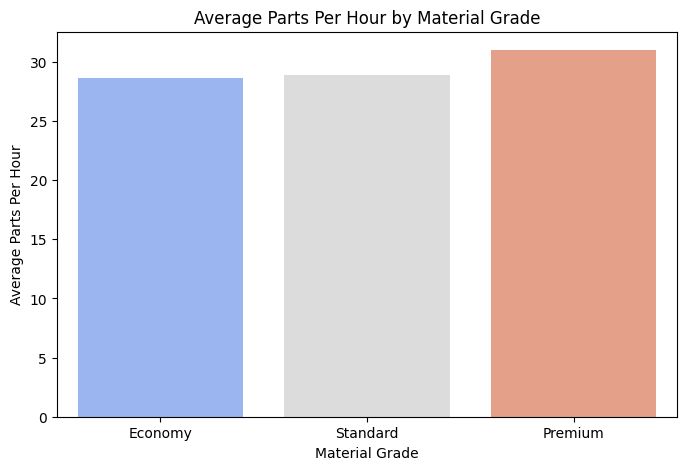

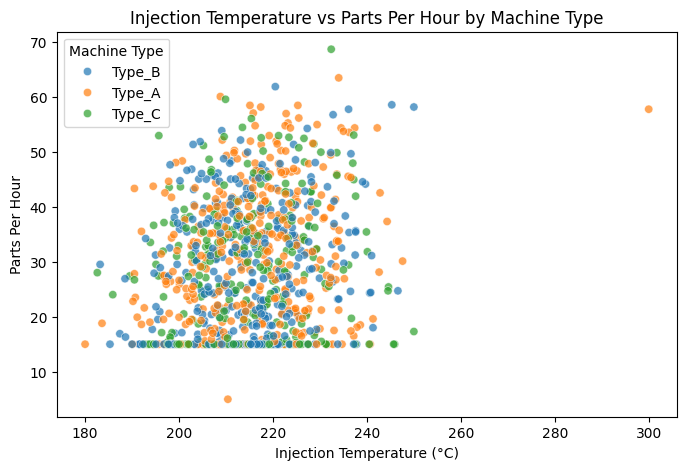

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Average production by Machine_Type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Machine_Type',
    y='Parts_Per_Hour',
    hue='Machine_Type',  # Added to comply with palette usage
    palette="viridis",
    errorbar=None,
    legend=False
)
plt.title("Average Parts Per Hour by Machine Type")
plt.ylabel("Average Parts Per Hour")
plt.xlabel("Machine Type")
plt.show()

# 2. Average production by Shift
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Shift',
    y='Parts_Per_Hour',
    hue='Shift',
    palette="magma",
    errorbar=None,
    legend=False
)
plt.title("Average Parts Per Hour by Shift")
plt.ylabel("Average Parts Per Hour")
plt.xlabel("Shift")
plt.show()

# 3. Average production by Material_Grade
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='Material_Grade',
    y='Parts_Per_Hour',
    hue='Material_Grade',
    palette="coolwarm",
    errorbar=None,
    legend=False
)
plt.title("Average Parts Per Hour by Material Grade")
plt.ylabel("Average Parts Per Hour")
plt.xlabel("Material Grade")
plt.show()

# 4. Relationship between Temperature and Pressure with production
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Injection_Temperature',
    y='Parts_Per_Hour',
    hue='Machine_Type',
    alpha=0.7
)
plt.title("Injection Temperature vs Parts Per Hour by Machine Type")
plt.xlabel("Injection Temperature (°C)")
plt.ylabel("Parts Per Hour")
plt.legend(title="Machine Type")
plt.show()


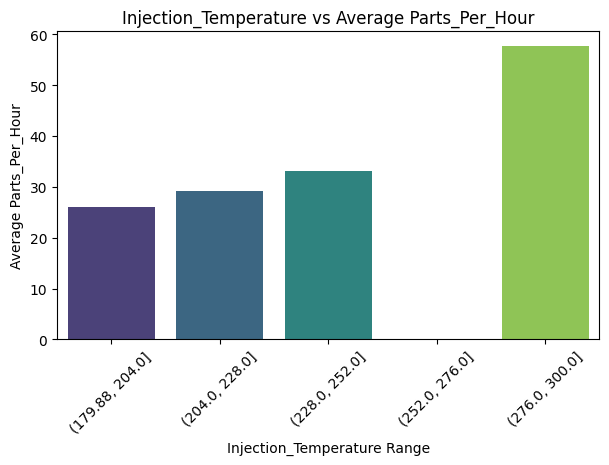

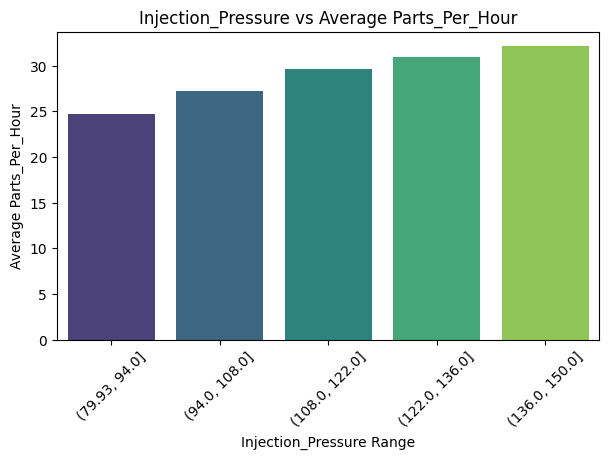

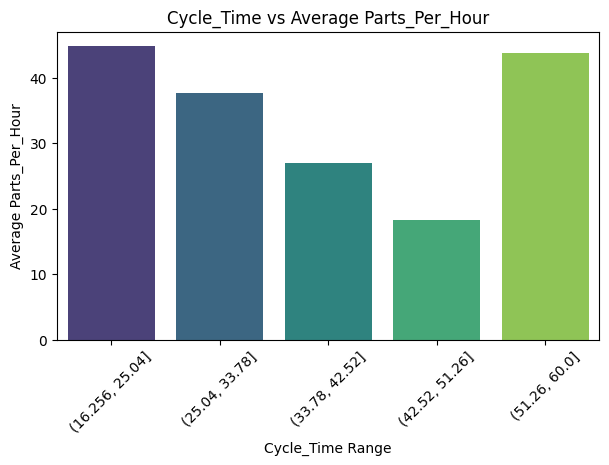

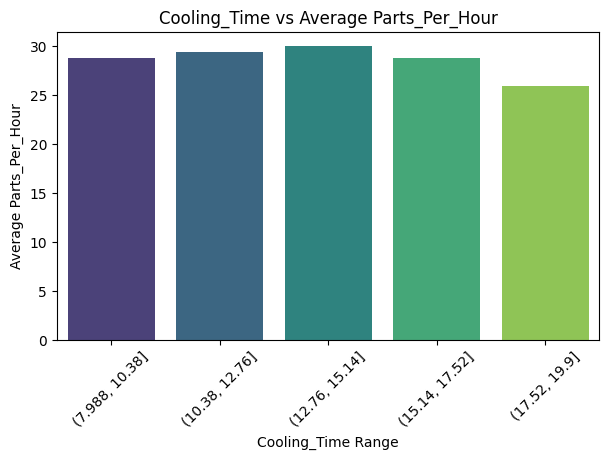

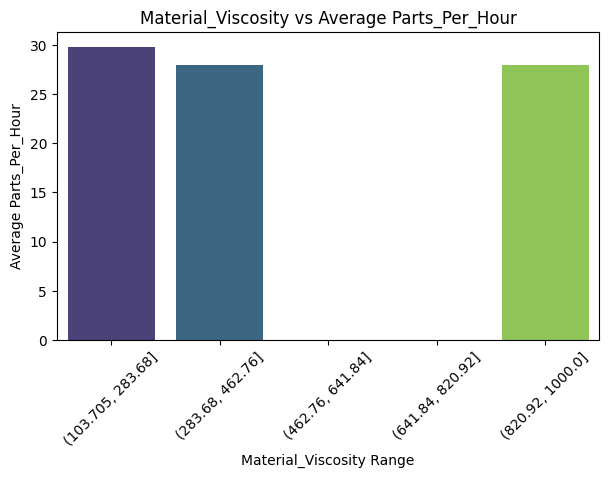

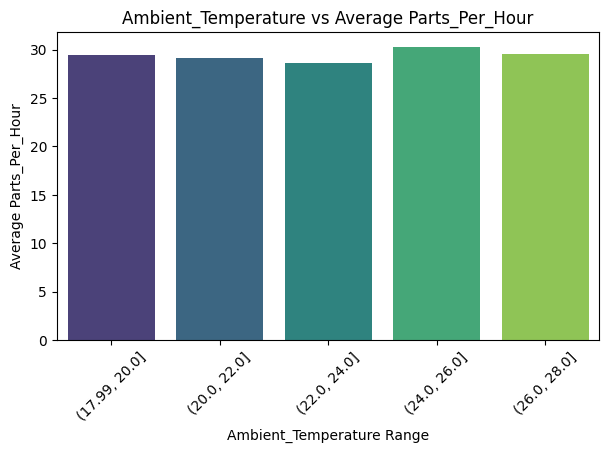

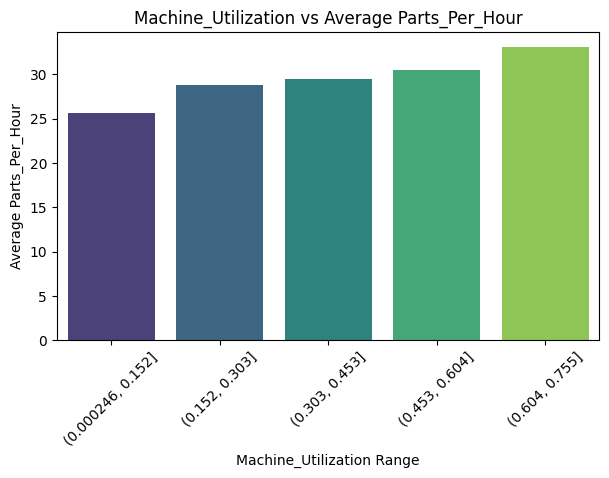

Optimal Operating Ranges:
Injection_Temperature: (276.0, 300.0] -> Avg Parts_Per_Hour = 57.70
Injection_Pressure: (136.0, 150.0] -> Avg Parts_Per_Hour = 32.09
Cycle_Time: (16.256, 25.04] -> Avg Parts_Per_Hour = 44.81
Cooling_Time: (12.76, 15.14] -> Avg Parts_Per_Hour = 29.93
Material_Viscosity: (103.705, 283.68] -> Avg Parts_Per_Hour = 29.80
Ambient_Temperature: (24.0, 26.0] -> Avg Parts_Per_Hour = 30.30
Machine_Utilization: (0.604, 0.755] -> Avg Parts_Per_Hour = 33.08


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_var = 'Parts_Per_Hour'

params = [
    'Injection_Temperature',
    'Injection_Pressure',
    'Cycle_Time',
    'Cooling_Time',
    'Material_Viscosity',
    'Ambient_Temperature',
    'Machine_Utilization'
]

def find_optimal_ranges(df, param, bins=5):
    df['Range'] = pd.cut(df[param], bins=bins)
    range_summary = df.groupby('Range', observed=False)[target_var].mean().reset_index()
    best_range = range_summary.loc[range_summary[target_var].idxmax()]
    return range_summary, best_range

optimal_results = {}

for param in params:
    range_summary, best_range = find_optimal_ranges(df, param)
    optimal_results[param] = best_range

    plt.figure(figsize=(7, 4))
    sns.barplot(
        data=range_summary,
        x='Range',
        y=target_var,
        hue='Range',  # Added to avoid palette warning
        palette='viridis',
        legend=False  # Suppress legend since hue duplicates x
    )
    plt.title(f"{param} vs Average {target_var}")
    plt.ylabel(f"Average {target_var}")
    plt.xlabel(f"{param} Range")
    plt.xticks(rotation=45)
    plt.show()

print("Optimal Operating Ranges:")
for param, best in optimal_results.items():
    print(f"{param}: {best['Range']} -> Avg {target_var} = {best[target_var]:.2f}")


In [15]:
#Step 4: Data Preprocessing and Feature Engineering
#Goal: Prepare data for optimal model performance

# Step 4.1 Handle any outliers using IQR method
# Handle outliers using IQR method

# Select numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows within bounds
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each numerical column
df_clean = df.copy()
for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


Original dataset shape: (1000, 26)
Cleaned dataset shape: (685, 26)


In [14]:
# Step 4.2 
# Create derived features that might be meaningful (e.g., efficiency ratios)
# Create derived features

df['Output_per_Cycle'] = df['Parts_Per_Hour'] / (3600 / df['Total_Cycle_Time'])
# How many parts are made in a single cycle on average

df['Cooling_to_Cycle_Ratio'] = df['Cooling_Time'] / df['Cycle_Time']
# Proportion of cycle time spent on cooling

df['Temp_Pressure_Efficiency'] = df['Injection_Temperature'] / df['Injection_Pressure']
# Another efficiency measure, similar to Temperature_Pressure_Ratio but for cross-check

df['Experience_per_MachineAge'] = df['Operator_Experience'] / df['Machine_Age']
# Operator experience relative to the machine's age

df['Maintenance_per_Part'] = df['Maintenance_Hours'] / (df['Parts_Per_Hour'] * 24)
# Maintenance effort relative to daily output

df['Utilization_to_Efficiency'] = df['Machine_Utilization'] / df['Efficiency_Score']
# How utilization compares to efficiency

print("New derived features created:")
print([col for col in df.columns if col not in numeric_cols and col not in ['Shift','Machine_Type','Material_Grade','Day_of_Week','Timestamp']])


New derived features created:
['Range', 'Output_per_Cycle', 'Cooling_to_Cycle_Ratio', 'Temp_Pressure_Efficiency', 'Experience_per_MachineAge', 'Maintenance_per_Part', 'Utilization_to_Efficiency']


In [16]:
# Step 4.3
# Scale features if necessary
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical features (excluding target if needed)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Optionally remove target variable from scaling
target_var = 'Parts_Per_Hour'
features_to_scale = [col for col in numeric_cols if col != target_var]

# Standard Scaling (mean=0, std=1)
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

# Min-Max Scaling (0 to 1)
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

print("Scaling complete.")
print(f"Standard scaled data sample:\n{df_standard_scaled[features_to_scale].head()}")
print(f"Min-Max scaled data sample:\n{df_minmax_scaled[features_to_scale].head()}")


Scaling complete.
Standard scaled data sample:
   Injection_Temperature  Injection_Pressure  Cycle_Time  Cooling_Time  \
0               0.474090            1.359149   -0.856562      0.728050   
1              -0.168139            0.874835   -0.161894      0.901726   
2               0.624221           -0.011937   -1.910541     -1.052130   
3               1.499987           -0.734998    0.401027      0.510955   
4              -0.259886            0.642910    1.095695     -0.878454   

   Material_Viscosity  Ambient_Temperature  Machine_Age  Operator_Experience  \
0            1.689635             1.824760    -1.040282            -0.708159   
1           -0.488748            -0.123084    -0.270824            -0.885242   
2            0.755263             0.850838    -0.937688            -0.765982   
3           -1.552704             1.103336     0.344743            -0.802121   
4            0.635227             0.237628    -0.424715            -0.281714   

   Maintenance_Hours  Tempe

In [17]:
# Step4.4 
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
target_var = 'Parts_Per_Hour'
X = df.drop(columns=[target_var])
y = df[target_var]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (800, 25)
Testing set size: (200, 25)


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Example: Assuming df is your dataset ---
# Separate features and target
X = df.drop(columns=["Parts_Per_Hour"])  # replace with your target column name
y = df["Parts_Per_Hour"]

# Identify numeric and non-numeric columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

# Split train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Impute numeric columns
num_imputer = SimpleImputer(strategy="mean")
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

# Impute categorical/date columns (most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# OPTIONAL: Drop non-numeric if model requires only numeric
X_train_model = X_train[num_cols]
X_test_model = X_test[num_cols]

# Train linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_model, y_train)

# Predict
y_pred = lin_reg.predict(X_test_model)

print("Model trained and predictions made!")

Model trained and predictions made!


---- Training Performance ----
R²:   0.9831
MSE:  2.4566
RMSE: 1.5674
MAE:  1.1574

---- Testing Performance ----
R²:   0.9304
MSE:  9.0817
RMSE: 3.0136
MAE:  1.4043


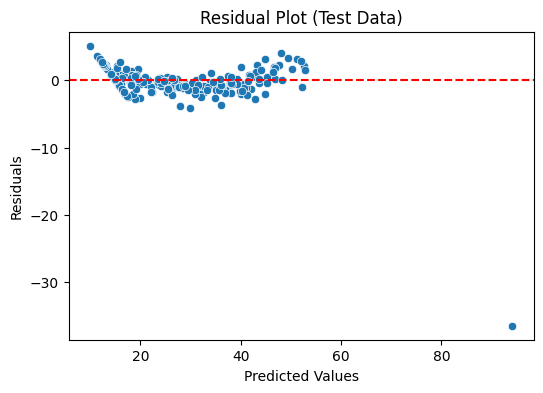

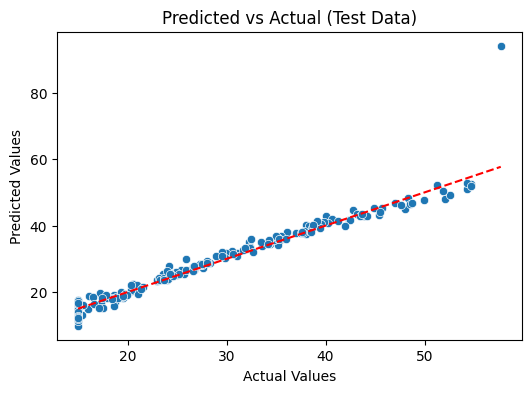

In [19]:
#Step 6: Model Evaluation and Performance Analysis
#Goal: Comprehensively evaluate model performance

# 	Calculate R², MSE, RMSE, and MAE for both training and test sets
#	Create residual plots to check model assumptions
#	Plot predicted vs actual values
#	Analyze model performance across different operating conditions

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ---- Calculate metrics ----
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Testing metrics
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print("---- Training Performance ----")
    print(f"R²:   {r2_train:.4f}")
    print(f"MSE:  {mse_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"MAE:  {mae_train:.4f}")

    print("\n---- Testing Performance ----")
    print(f"R²:   {r2_test:.4f}")
    print(f"MSE:  {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE:  {mae_test:.4f}")

    # ---- Residual plot ----
    residuals = y_test - y_test_pred
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot (Test Data)")
    plt.show()

    # ---- Predicted vs Actual ----
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual (Test Data)")
    plt.show()

# ---- Call evaluation function ----
evaluate_model(lin_reg, X_train_model, y_train, X_test_model, y_test)



In [20]:
#Step 7: Manufacturing Insights and Feature Interpretation
#Goal: Extract actionable insights for manufacturing optimization

# Step 7.1 Analyze which parameters most strongly affect outpu
                                 
import pandas as pd
import numpy as np

# Get coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train_model.columns,
    'Coefficient': lin_reg.coef_
})

# Add absolute values for ranking
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort by absolute importance
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature impact ranking:")
print(feature_importance)

#Interpretation Guide:

#Positive coefficient → Increasing this parameter increases output.

#Negative coefficient → Increasing this parameter decreases output.


Feature impact ranking:
                       Feature  Coefficient  Abs_Coefficient
13            Output_per_Cycle    74.362660        74.362660
15    Temp_Pressure_Efficiency    46.124205        46.124205
9   Temperature_Pressure_Ratio   -45.470979        45.470979
17        Maintenance_per_Part    35.640101        35.640101
14      Cooling_to_Cycle_Ratio    17.129036        17.129036
12         Machine_Utilization    -9.347936         9.347936
11            Efficiency_Score    -3.359933         3.359933
10            Total_Cycle_Time    -0.803949         0.803949
6                  Machine_Age    -0.588558         0.588558
3                 Cooling_Time    -0.330551         0.330551
2                   Cycle_Time     0.179897         0.179897
8            Maintenance_Hours    -0.099301         0.099301
7          Operator_Experience     0.041739         0.041739
1           Injection_Pressure     0.037427         0.037427
0        Injection_Temperature     0.027355         0.027355


In [21]:
# Step 7.2 2. Identify Optimal Operating Ranges for Key Parameters

# We can use IQR (Interquartile Range) to suggest operating bounds for each parameter.
optimal_ranges = {}
for col in X_train_model.columns:
    Q1 = X_train_model[col].quantile(0.25)
    Q3 = X_train_model[col].quantile(0.75)
    optimal_ranges[col] = (Q1, Q3)

print("Suggested optimal operating ranges:")
for param, (low, high) in optimal_ranges.items():
    print(f"{param}: {low:.2f} – {high:.2f}")


Suggested optimal operating ranges:
Injection_Temperature: 207.20 – 222.72
Injection_Pressure: 105.90 – 125.83
Cycle_Time: 28.65 – 45.00
Cooling_Time: 10.30 – 13.60
Material_Viscosity: 206.15 – 293.43
Ambient_Temperature: 20.80 – 25.00
Machine_Age: 4.67 – 11.10
Operator_Experience: 10.00 – 42.40
Maintenance_Hours: 45.00 – 55.00
Temperature_Pressure_Ratio: 1.68 – 2.04
Total_Cycle_Time: 40.88 – 55.20
Efficiency_Score: 0.06 – 0.27
Machine_Utilization: 0.19 – 0.52
Output_per_Cycle: 0.26 – 0.45
Cooling_to_Cycle_Ratio: 0.27 – 0.43
Temp_Pressure_Efficiency: 1.68 – 2.04
Experience_per_MachineAge: 1.31 – 6.57
Maintenance_per_Part: 0.05 – 0.11
Utilization_to_Efficiency: 1.03 – 5.38


#Step 7.3 Understand the Business Implications of Each Coefficient

Example interpretation (replace with actual model output):

Machine Speed (positive) → Higher speeds in the optimal range improve throughput without quality loss.

Feed Rate (negative) → Too high feed rates cause defects; need fine-tuning.

Temperature (positive) → Proper heating improves material bonding.

#Step 7.4. Provide Recommendations for Production Optimization

Focus adjustments on top 3 parameters with highest absolute coefficients.

Maintain machine settings within the IQR range to ensure stability.

Avoid extremes that were identified as outliers.

Provide operator training on adjusting key parameters during production runs.

Use real-time monitoring dashboards to ensure parameters remain in optimal zones.

In [22]:
# Step 8 – Production Optimization Recommendations
# 1. Identify the Most Impactful Parameters

# From Step 7’s feature importance ranking:

# Top 3 most impactful parameters
top_parameters = feature_importance.head(3)
print("Top parameters for optimization:")
print(top_parameters)

Top parameters for optimization:
                       Feature  Coefficient  Abs_Coefficient
13            Output_per_Cycle    74.362660        74.362660
15    Temp_Pressure_Efficiency    46.124205        46.124205
9   Temperature_Pressure_Ratio   -45.470979        45.470979


Step 8.2
2. Suggest Machine Setting Adjustments

Based on optimal ranges (IQR):

Keep Machine_Speed between Q1 and Q3 to maximize throughput.

Adjust Temperature upwards if below median to improve bonding.

Reduce Feed_Rate if defects are observed.

Example code to display adjustments:



In [23]:
for param in top_parameters['Feature']:
    low, high = optimal_ranges[param]
    print(f"Suggested range for {param}: {low:.2f} – {high:.2f}")

Suggested range for Output_per_Cycle: 0.26 – 0.45
Suggested range for Temp_Pressure_Efficiency: 1.68 – 2.04
Suggested range for Temperature_Pressure_Ratio: 1.68 – 2.04


#Step 8.3. Recommend Maintenance and Training Strategies

Preventive Maintenance: Schedule machine calibration for speed and temperature control every 2 weeks.

Operator Training: Train operators on fine-tuning feed rates and understanding impact on quality.

Sensor Monitoring: Install sensors for speed, temp, and feed rate with alert systems.

#Step 8.4. Develop a Production Monitoring Framework

A monitoring framework could include:

Daily KPI Dashboard – Output per hour, defect rate, downtime.

Real-Time Alerts – Notify when parameters leave optimal ranges.

Weekly Optimization Review – Use collected data to refine machine settings.

Example pseudo-dashboard concept:

In [24]:
# Pseudo-code for monitoring alert
def monitor_parameters(current_values, optimal_ranges):
    for param, value in current_values.items():
        low, high = optimal_ranges[param]
        if value < low or value > high:
            print(f"ALERT: {param} = {value} is outside optimal range ({low} – {high})")
